# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import joblib

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data_df = pd.read_csv("../Dataset/Scraped_Dataset.csv")
data_df.head()

,review,label
0,"not bad stay pretty pleasant, alarm going 3 no...",POSITIVE
1,westin times square cheats customer starwood p...,NEGATIVE
2,good news/ bad news seattle just night opted l...,POSITIVE
3,expectations booked riu bambu online having st...,NEGATIVE
4,hospital stayed 2 weeks got sick stomach upset...,NEGATIVE


# EXPLORATORY DATA ANALYSIS

In [3]:
# Function to visualize distribution of "Positive" and "Negative" reviews
def plot_label_counts(data_df, dist=1000):
    label_counts = data_df['label'].value_counts()
    plt.figure(figsize=(8, 6))
    label_counts.plot(kind='bar', color=['green', 'red'], alpha=0.7, edgecolor='black')

    plt.xlabel('label', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.title('Comparison of Positive and Negative Labels', fontsize=16)

    for index, value in enumerate(label_counts):
        plt.text(index, value + dist, str(value), ha='center', fontsize=12)

    plt.show()

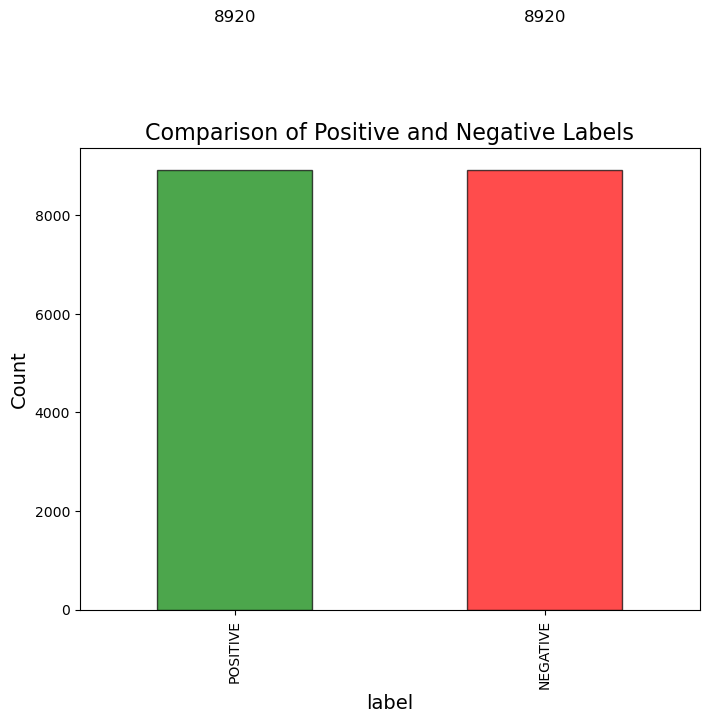

In [4]:
# Visualize distribution
plot_label_counts(data_df, 3000)

# DATA PREPARATION

In [5]:
# Encoding labels
label_enc = LabelEncoder()
y = label_enc.fit_transform(data_df.label.values)
y

array([1, 0, 1, ..., 1, 1, 0])

In [6]:
# Save the TF-IDF vectorizer
joblib.dump(label_enc, '../artifacts/NPN_Label_Encoder.pkl')

['../artifacts/NPN_Label_Encoder.pkl']

In [7]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(data_df.review, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14272,), (3568,), (14272,), (3568,))

In [8]:
# Creating feature vector
tfv = TfidfVectorizer(min_df=3, strip_accents='unicode', token_pattern=r'\w{1,}', ngram_range=(1, 3), sublinear_tf=True, stop_words = 'english')

In [9]:
# Fit the TFIDF vectorizer on the training data
tfv.fit(X_train)

TfidfVectorizer(min_df=3, ngram_range=(1, 3), stop_words='english',
                strip_accents='unicode', sublinear_tf=True,
                token_pattern='\\w{1,}')

In [10]:
# Transform the training and test data
X_train_tfv = tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

In [11]:
# Save the TF-IDF vectorizer
joblib.dump(tfv, '../artifacts/NPN_TF_IDF_Vectorizer.pkl')

['../artifacts/NPN_TF_IDF_Vectorizer.pkl']

# MODEL

## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
# Fit the Logistic Regression model
model1 = LogisticRegression()
model1.fit(X_train_tfv, y_train)

LogisticRegression()

In [14]:
# Predict on the test set
y_pred = model1.predict(X_test_tfv)

In [15]:
y_pred

array([0, 1, 1, ..., 0, 0, 1])

In [22]:
# Save the model
joblib.dump(model1, '../artifacts/NPN_Logistic_Regression_Model.pkl')

['../artifacts/NPN_Logistic_Regression_Model.pkl']

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [24]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8932

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1798
           1       0.89      0.90      0.89      1770

    accuracy                           0.89      3568
   macro avg       0.89      0.89      0.89      3568
weighted avg       0.89      0.89      0.89      3568



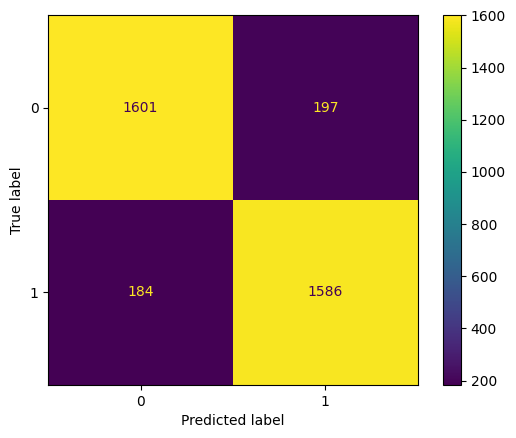

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [26]:
# Probabilities
y_prob = model1.predict_proba(X_test_tfv)[:, 1]

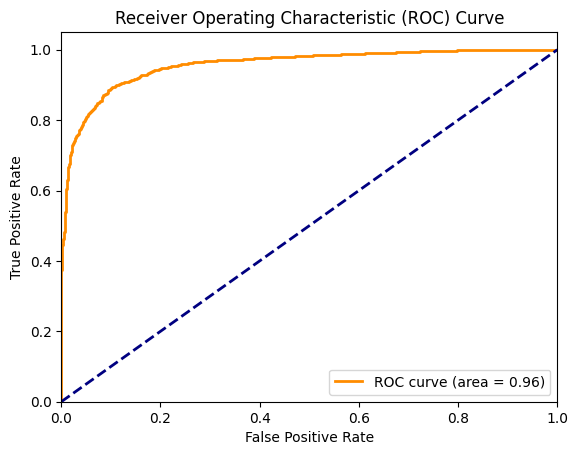

In [27]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
# Fit the Random Forest model
model2 = RandomForestClassifier(random_state=42)
model2.fit(X_train_tfv, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Predict on the test set
y_pred = model2.predict(X_test_tfv)

In [31]:
# Save the model
joblib.dump(model2, '../artifacts/NPN_Random_Forest_Model.pkl')

['../artifacts/NPN_Random_Forest_Model.pkl']

In [32]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [33]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8730

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1798
           1       0.91      0.83      0.87      1770

    accuracy                           0.87      3568
   macro avg       0.88      0.87      0.87      3568
weighted avg       0.88      0.87      0.87      3568



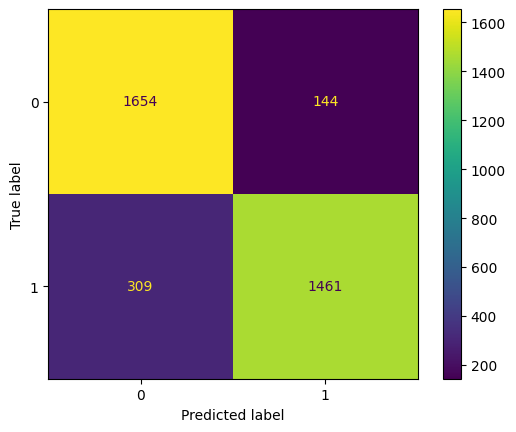

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [35]:
# Probabilities
y_prob = model2.predict_proba(X_test_tfv)[:, 1]

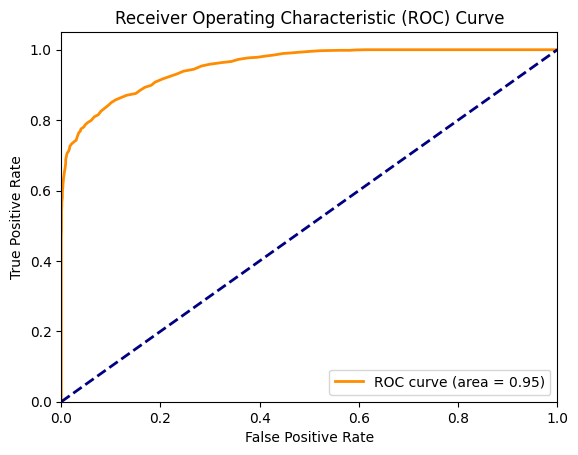

In [36]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

In [38]:
# Fit the Naive Bayes model
model3 = MultinomialNB()
model3.fit(X_train_tfv, y_train)

MultinomialNB()

In [39]:
# Predict on the test set
y_pred = model3.predict(X_test_tfv)

In [40]:
# Save the model
joblib.dump(model3, '../artifacts/NPN_Naive_Bayes_Model.pkl')

['../artifacts/NPN_Naive_Bayes_Model.pkl']

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [42]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8694

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1798
           1       0.94      0.79      0.86      1770

    accuracy                           0.87      3568
   macro avg       0.88      0.87      0.87      3568
weighted avg       0.88      0.87      0.87      3568



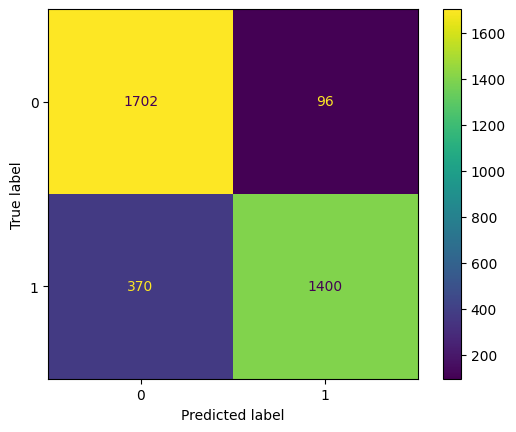

In [43]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [44]:
# Probabilities
y_prob = model3.predict_proba(X_test_tfv)[:, 1]

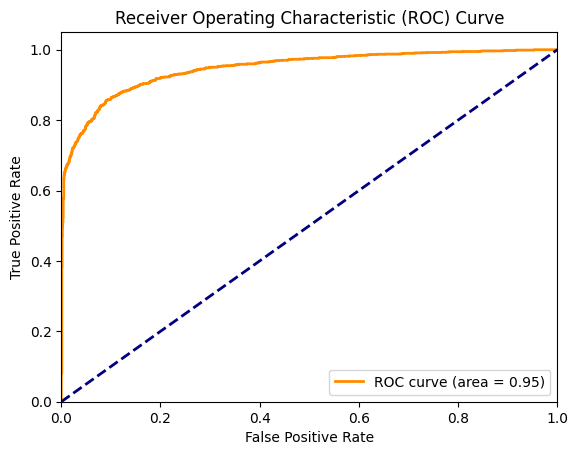

In [45]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## XGBoost

In [46]:
import xgboost as xgb

In [47]:
# Fit the XGBoost model
model4 = xgb.XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)
model4.fit(X_train_tfv, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [48]:
# Predict on the test set
y_pred = model4.predict(X_test_tfv)

In [49]:
# Save the model
joblib.dump(model4, '../artifacts/NPN_XGBoost_Model.pkl')

['../artifacts/NPN_XGBoost_Model.pkl']

In [50]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8694

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1798
           1       0.94      0.79      0.86      1770

    accuracy                           0.87      3568
   macro avg       0.88      0.87      0.87      3568
weighted avg       0.88      0.87      0.87      3568



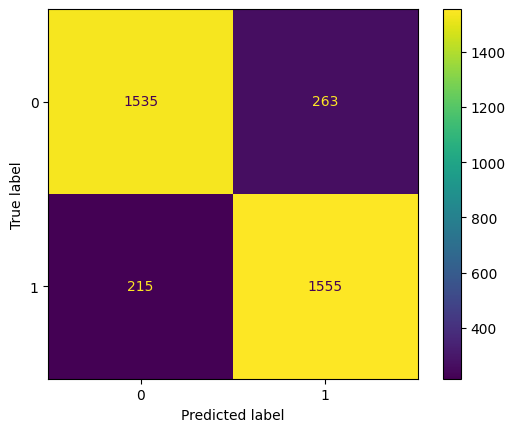

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [52]:
# Probabilities
y_prob = model4.predict_proba(X_test_tfv)[:, 1]

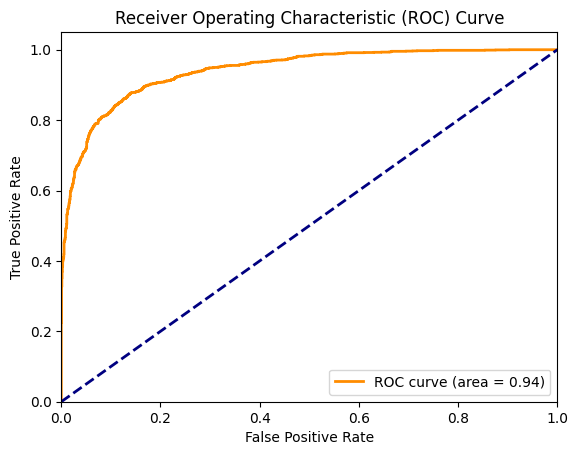

In [53]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## LightGBM

In [54]:
import lightgbm as lgb

In [55]:
# Fit the LightGBM model
model5 = lgb.LGBMClassifier()
model5.fit(X_train_tfv, y_train)

[LightGBM] [Info] Number of positive: 7150, number of negative: 7122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.190253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 239279
[LightGBM] [Info] Number of data points in the train set: 14272, number of used features: 7595
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500981 -> initscore=0.003924
[LightGBM] [Info] Start training from score 0.003924


LGBMClassifier()

In [56]:
# Predict on the test set
y_pred = model5.predict(X_test_tfv)

In [57]:
# Save the model
joblib.dump(model5, '../artifacts/NPN_LightGBM_Model.pkl')

['../artifacts/NPN_LightGBM_Model.pkl']

In [58]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [59]:
# Output the results
print(f'Accuracy: {accuracy:.4f}')
print('\nClassification Report:')
print(class_report)

Accuracy: 0.8697

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1798
           1       0.86      0.88      0.87      1770

    accuracy                           0.87      3568
   macro avg       0.87      0.87      0.87      3568
weighted avg       0.87      0.87      0.87      3568



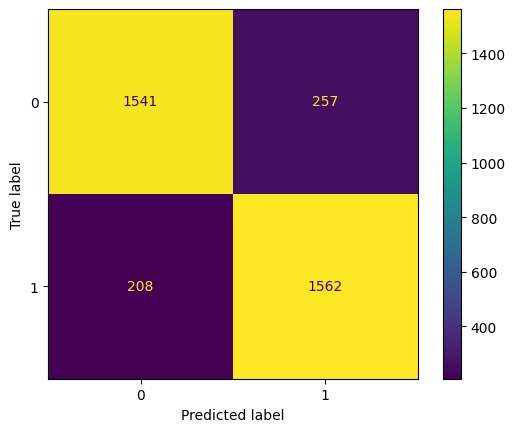

In [60]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model5.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap=plt.cm.viridis)
plt.show()

In [61]:
# Probabilities
y_prob = model5.predict_proba(X_test_tfv)[:, 1]

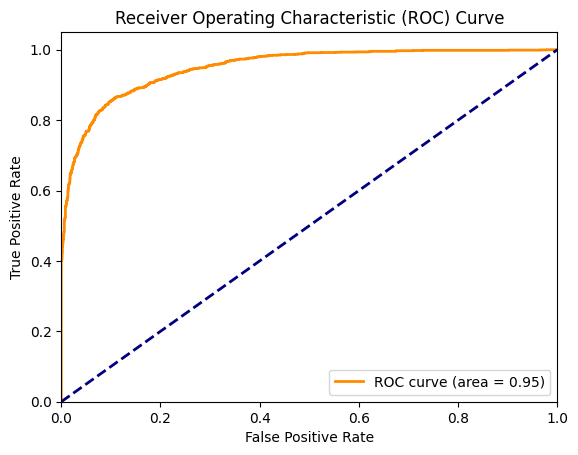

In [62]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## LSTM

In [20]:
X_test_tfv.shape,X_train_tfv.shape[1]

((3568, 100293), 100293)

In [21]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

# Define the input layer
input_layer = Input(shape=(X_train_tfv.shape[1],))

# Embedding layer
embedding_layer = Embedding(input_dim=5000, output_dim=128, input_length=200)(input_layer)

# LSTM layer
lstm_layer = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(embedding_layer)

# Output layer
output_layer = Dense(1, activation="sigmoid")(lstm_layer)

# Define the model
model6 = Model(inputs=input_layer, outputs=output_layer)

# Display the model summary
model6.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100293)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 100293, 128)         │         640,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 771,713 (2.94 MB)

 Trainable params: 771,713 (2.94 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# compile the model
model6.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model6.fit(X_train_tfv, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5


In [ ]:
loss, accuracy = model6.evaluate(X_test_tfv, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# SAMPLE PREDICTIONS

In [63]:
# Sample predictions from the dataset
num_samples = 10

# Randomly select indices from the test set
random_indices = np.random.choice(len(X_test), size=num_samples, replace=False)

# Get sample data based on the random indices
X_sample = X_test.iloc[random_indices]
y_sample_true = y_test[random_indices]
y_sample_pred = y_pred[random_indices]

# Create a DataFrame to display results
sample_df = pd.DataFrame({
    'Review': X_sample,
    'True Label': label_enc.inverse_transform(y_sample_true),
    'Predicted Label': label_enc.inverse_transform(y_sample_pred)
})

print("Sample Predictions:")
print(sample_df)

Sample Predictions:
                                                  Review True Label  \
12068  waterview room balcony worth money, husband st...   POSITIVE   
299    watch room charges stayed weekend sci-fi conve...   NEGATIVE   
9214   courteous staff clean room friendly helpful st...   POSITIVE   
6074   Very good budget hotel with good amenities com...   POSITIVE   
17395  great value location got hotel recomendation t...   NEGATIVE   
12240  My parents checked in and they were told by th...   NEGATIVE   
14232  small fine really really really small room old...   POSITIVE   
12093  Reception staff is worst. I don't want to say ...   NEGATIVE   
9707   Overall an amazing experience. We booked a roo...   POSITIVE   
9016   decent location nice staff disappointing read ...   NEGATIVE   

      Predicted Label  
12068        NEGATIVE  
299          NEGATIVE  
9214         POSITIVE  
6074         POSITIVE  
17395        POSITIVE  
12240        NEGATIVE  
14232        POSITIVE  
12093 

In [64]:
# Sample custom prediction
sample_review = ["Rooms are not clean enough. TV non functional. Big water heater is dead. Room service is there but the attendant is unprofessional."]
sample_review_tfv = tfv.transform(sample_review)
sample_pred = model1.predict(sample_review_tfv)
sample_pred_label = label_enc.inverse_transform(sample_pred)

print(f'Sample Review: "{sample_review[0]}"')
print(f'Predicted Sentiment: {sample_pred_label[0]}')

Sample Review: "Rooms are not clean enough. TV non functional. Big water heater is dead. Room service is there but the attendant is unprofessional."
Predicted Sentiment: NEGATIVE
